# Стандартная ошибка

Стандартная ошибка статистики (standard error of statistic), обычно используемой в качестве эстиматора для какого-либо параметра - это стандартное отклонение выборочного распределения этой статистики. Если в качестве статистики выступает среднее значение (mean), то речь идёт о стандартной ошибке среднего - standard error of the mean или S.E.M.

Схема проста. Выбираем интересующую нас статистику. Берём генеральную совокупность, и начинаем раз за разом вытягивать из неё выборки размера $n$; на каждой выборке замеряем значения выбранной нами статистики. Поскольку мы повторяем этот процесс многократно, у нас получается некое распределение данной статистики. Соответственно, стандартное отклонение полученного распределения - это и есть стандартная ошибка.

**Интуиция:** стандартная ошибка - это то, насколько в среднем значения интересующей нас статистики будут различаться от выборки к выборке. Сильно ли скачут туда-сюда значения этой статистики на разных выборках, или нет? Насколько мы уверены в том, что статистика на выборке отражает реальное значение параметра на совокупности?

**Зачем она нужна:** 
* Для измерения степени нашей "неуверенности" в эстимации интересующего нас параметра на основе имеющейся выборочной статистики; чем больше стандартная ошибка - тем меньше мы уверены в точности эстимации.
* Для построения доверительных интервалов, например 95%-интервалов, в которые скорее всего будет попадать оценка интересующего нас параметра популяции $p$, вычисленная на основе имеющейся у нас статистики.

Ну то есть вот у нас есть только одна выборка и мы наблюдаем на ней некоторое значение интересующей нас статистики, например - мы наблюдаем определённое значение выборочного среднего $\bar{x}$. Мы выбираем его в качестве эстиматора для параметра "совокупное среднее $\mu$", и предполагаем, что $\bar{x}=\mu$, ну а собственно альтернативных предположений у нас и нет, откуда их взять-то. Теперь нас интересует, насколько высока (или низка) склонность нашего эстиматора к прыжкам туда-сюда в зависимости от имеющейся конкретной выборки. Это можно прикинуть как:
$$\sigma_{\bar{x}}\approx{\frac{s}{\sqrt{n}}}$$
Теперь - собственно, пример применения стандартной ошибки. Здесь она нам послужит для конструирования доверительного интервала для неизвестного значения параметра "совокупное среднее $\mu$" на основании выборочного среднего $\bar{x}$. Если выборочное распределение приближается к Нормальному, то мы смело можем пользоваться квантилями и интервалами Нормального распределения:

$$Upper\space95\%\space limit = \bar{x} + (S.E. \cdot 1.96)$$
$$Lower\space95\%\space limit = \bar{x} - (S.E. \cdot 1.96)$$

Проверим это экспериментально.

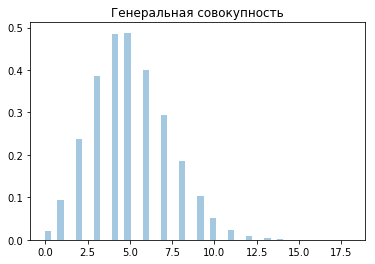

Совокупное среднее: 5.00598 стремится к 5


In [387]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

FONT_BOLD, FONT_END = '\033[1m', '\033[0m'

LAMBDA = 5
POPULATION_SIZE = 100000

# Сгенерируем популяцию из распределения Пуассона:
population = np.random.poisson(LAMBDA, POPULATION_SIZE)
sns.distplot(population, kde=False, norm_hist=True)
plt.title('Генеральная совокупность')
plt.show()
print('Совокупное среднее:', np.mean(population), 'стремится к', LAMBDA)

Реальное среднее популяции: 5.00598
Реальная стандарная ошибка среднего:  0.0710008749214  (рассчитано используя совокупное среднее)
Полученная экспериментально стандартная ошибка среднего: 0.0737036464498
	--- 95% доверительный интервал в этом случае: [ 4.939 ± 0.144459147042 ]
Рассчитанная теоретически стандартная ошибка среднего:   0.0703795353778
	--- 95% доверительный интервал в этом случае: [ 4.939 ± 0.137943889341 ]


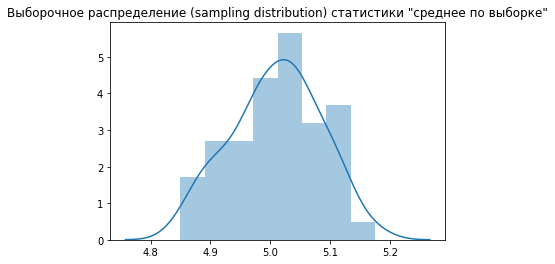

Среднее значение этого распределения: 5.00965


In [388]:
NUM_EXPERIMENTS = 100
SAMPLE_SIZE     = 1000

# Определим эксперимент: вытягивание выборки размера sample_size и замер среднего на этой выборке:
def experiment(pop, sample_size):
    sample = np.random.choice(pop, sample_size, replace=False)
    return np.mean(sample)

# Проведём эксперимент NUM_EXPERIMENTS раз, а затем отобразим получившееся распределение средних значений:
means = [experiment(population, SAMPLE_SIZE) for i in range(NUM_EXPERIMENTS)]
single_sample = np.random.choice(population, SAMPLE_SIZE, replace=False)
print('Реальное среднее популяции:', np.mean(population))
print(FONT_BOLD + 'Реальная стандарная ошибка среднего: ', np.std(population)/np.sqrt(SAMPLE_SIZE), FONT_END,
      '(рассчитано используя совокупное среднее)')
print('Полученная экспериментально стандартная ошибка среднего:', np.std(means))
print('\t--- 95% доверительный интервал в этом случае: [',
      np.mean(single_sample), '±', (1.96*np.std(means)), ']')
print('Рассчитанная теоретически стандартная ошибка среднего:  ',
      np.std(single_sample)/np.sqrt(SAMPLE_SIZE))
print('\t--- 95% доверительный интервал в этом случае: [',
      np.mean(single_sample), '±', (1.96*np.std(single_sample)/np.sqrt(SAMPLE_SIZE)), ']')
plt.clf()
plt.title('Выборочное распределение (sampling distribution) статистики "среднее по выборке"')
sns.distplot(means, kde=True, norm_hist=True)
plt.show()
print('Среднее значение этого распределения:', np.mean(means))

Согласно **теореме центрального предела**, с увеличением размера выборки, выборочное распределение среднего ассимптотически Нормально (то есть стремится к Нормальному).

<br><br><br>
## Проведём эксперимент на линейной регресии

1. Пусть есть генеральная совокупность $A$. Подгоним к ней линейную регрессию; полученная линия регрессии составит "истинную линию регресии", тогда как её коэффициенты $\beta_i$ - "истинные значения коэффициентов".
2. Возьмём из неё выборку размера $n$, в которой все наблюдения вытянуты независимо друг от друга. Подгоним линейную регресию к этой выборке и замерим полученные коэффициенты $\hat{\beta_i}$  - "выборочные значения коэффициентов".
3. Нас интересует, как далеко лежат истинные значения коэффициентов от полученных экспериментально выборочных значений? Вычислим стандарную ошибку для коэффициентов регрессии $\hat{SE}(\hat{\beta_i})$ и 95% доверительные интервалы, а затем проверим, попадают ли "истинные значенеия коэффициентов" в эти интервалы.

### 1:

Значения коэффициентов underlying-регрессионной линии (из make_regression):
	β0 = 45 
	β1 = 54.26787295132769
"Истинные" значения коэффициентов регрессии:
	β0 = 44.7371969 
	β1 = 56.5970853836


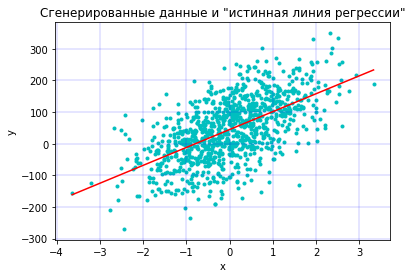

MSE "истинной" регрессии: 6226.33934023
MSE underlying-регрессии: 6232.27880406


In [415]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

BIAS  = 45
NOISE = 80
POPULATION_SIZE = 1000

# Сгенерируем более-менее гомоскедастичные данные, чтобы оценка стандартной ошибки не была смещена:
X, y, real_coef = make_regression(n_samples=POPULATION_SIZE, n_features=1, coef=True, noise=NOISE, bias=BIAS)

# Подгоним к данным "истинную" линейную регрессию:
lr = LinearRegression()
lr.fit(X, y)

# Отобразим данные и "истинную линию регрессии":
print('Значения коэффициентов underlying-регрессионной линии (из make_regression):')
print('\tβ0 =', BIAS, '\n\tβ1 =', real_coef.item(0))
print('"Истинные" значения коэффициентов регрессии:\n\tβ0 =', lr.intercept_, '\n\tβ1 =', lr.coef_[0])
plt.clf()
xx = np.linspace(min(X), max(X), 2)
plt.plot(xx, xx*lr.coef_[0] + lr.intercept_, c='r')
# ---
plt.scatter(X, y, marker='.', c='c')
plt.title('Сгенерированные данные и "истинная линия регрессии"')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.show()

print('MSE "истинной" регрессии:', mean_squared_error(y, lr.predict(X)))
predictions = X*real_coef.item(0) + BIAS
print('MSE underlying-регрессии:', mean_squared_error(y, predictions))

#### 2:

Возьмём из популяции выборку размера $n$, в которой все наблюдения вытянуты независимо друг от друга. Подгоним линейную регресию к этой выборке и замерим полученные коэффициенты $\hat{\beta_i}$ - "выборочные значения коэффициентов".

In [416]:
from sklearn.model_selection import train_test_split

SAMPLE_SIZE = 400

# Сформируем выборку:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size = SAMPLE_SIZE)

# Произведём подгонку:
lr.fit(X_sample, y_sample)

# Рассмотрим эстимации реальных коэффициентов:
print('Прогнозируемые значения коэффициентов регрессии:\n\tβ0 =', lr.intercept_, '\n\tβ1 =', lr.coef_[0])

Прогнозируемые значения коэффициентов регрессии:
	β0 = 47.0009858189 
	β1 = 57.1473940155


Построим 95% доверительный интервал для β1 и β0 - с помощью statsmodels и по формулам:

$$\hat{SE}(\hat{\beta_0})^2 = Var(\epsilon) \bigg[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2} \bigg] , \space\space\space
\hat{SE}(\hat{\beta_1})^2 = \frac{Var(\epsilon)}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

In [417]:
# Рассчёты по форулам::
beta0     = lr.intercept_
beta1     = lr.coef_[0]
residuals = y_sample - lr.predict(X_sample)
se_beta0  = np.var(residuals) * np.array(1/SAMPLE_SIZE + 
                                         ((np.mean(X_sample))**2)/np.sum(np.square(X_sample - np.mean(X_sample))))
se_beta0  = np.sqrt(se_beta0)
se_beta1  = np.var(residuals) / (np.sum(np.square(X_sample - np.mean(X_sample))))
se_beta1  = np.sqrt(se_beta1)
interval0 = np.array([[beta0 - 2*se_beta0, beta0 + 2*se_beta0]])
interval1 = np.array([[beta1 - 2*se_beta1, beta1 + 2*se_beta1]])
print('Интервалы по форулам:\n', interval0, '\n', interval1)
print('Стандартные ошибки:\n\tSE(β0) =', se_beta0, '\n\tSE(β1) =', se_beta1)
print('Прогнозируемые значения коэффициентов регрессии:\n\tβ0 =', beta0, '\n\tβ1 =', beta1, '\n')

# С помощью statsmodels:
import statsmodels.api as sm
statsmodels_result = sm.OLS(y_sample, sm.add_constant(X_sample)).fit()
print('Statsmodels-интервал:\n', statsmodels_result.conf_int(0.05))  # 95% confidence interval
statsmodels_result.summary()

Интервалы по форулам:
 [[ 39.2458355   54.75613613]] 
 [[ 51.03098057  63.26380746]]
Стандартные ошибки:
	SE(β0) = 3.87757515756 
	SE(β1) = 3.05820672281
Прогнозируемые значения коэффициентов регрессии:
	β0 = 47.0009858189 
	β1 = 57.1473940155 

Statsmodels-интервал:
 [[ 40.77268569  53.22928595]
 [ 51.13122756  63.16356047]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     348.0
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           1.47e-61
Time:                        06:21:29   Log-Likelihood:                -3461.9
No. Observations:                 600   AIC:                             6928.
Df Residuals:                     598   BIC:                             6937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.0010      3.171     14.821      0.000      40.773      53.229
x1            57.1474      3.063     18.655      0.000      51.131      63.164
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.653
Skew:                          -0.078   Prob(JB):                        0.721
Kurtosis:                       2.959   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Резидуалы, возвращаемые обеими моделями, практически одинаковы:

In [409]:
print(statsmodels_result.resid[:5])
print(residuals[:5])

[ -0.54703545  -6.29397665   8.88947295  -0.52992077  13.3937157 ]
[ -0.54703545  -6.29397665   8.88947295  -0.52992077  13.3937157 ]


<br><br><br>
## Распределение коэффициентов линейной регрессии

Вообще, рассмотрим какое распределение имеют коэффициенты линейной регрессии:

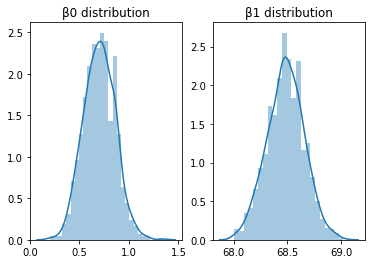

In [308]:
def experiment_coef_distribution(sample_size, num_experiments):
    betas_0, betas_1 = [], []
    for _ in range(num_experiments):
        X_sample, _, y_sample, _ = train_test_split(X, y, test_size = sample_size)
        reg = LinearRegression()
        reg.fit(X_sample, y_sample)
        betas_0.append(reg.intercept_)
        betas_1.append(reg.coef_[0])
    plt.clf()
    plt.subplot(1, 2, 1)
    sns.distplot(betas_0)
    plt.title('β0 distribution')
    plt.subplot(1, 2, 2)
    sns.distplot(betas_1)
    plt.title('β1 distribution')   
    plt.show()

experiment_coef_distribution(SAMPLE_SIZE, 1000)

Возможно, это Student's t-distribution, так?